In [11]:
import sys

import numpy as np
import pandas as pd
import tensorflow as tf
from keras import backend as K
from keras.datasets import mnist
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import SVG
from keras.layers import Activation, Dense
from keras.models import Sequential
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

#import graphviz

#SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [3]:
!pip install pydot

# 【問題1】公式Exampleを分担して実行
TensorFLowの公式Exampleを分担して実行してください。

以下の中から1人ひとつ選び実行し、その結果を簡単に発表してください。

In [ ]:
https://colab.research.google.com/drive/1QuiyxydNXiKRsWt4PGVndsM-1XsEz_hn#scrollTo=cDq0CIKc1vO

 # 【問題2】Iris（2値分類）をKerasで学習
TensorFlowによるIrisデータセットに対する2値分類をKerasに書き換えてください。

In [4]:

# データセットの読み込み
dataset_path ="Iris.csv"
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y) #numpy配列化
X = np.array(X) #numpy配列化

# ラベルを数値に変換
y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y = y.astype(np.int)[:, np.newaxis]
#print(y)
# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print("X.shape",X.shape)
print("X_train.shape", X_train.shape)


X.shape (100, 4)
X_train.shape (64, 4)


## Sequentialモデル

In [5]:
#Sequentialモデル
#ロジスティック回帰を作るために、全結合層のクラス、tf.keras.layers.Denseを使います。
#引数に出力のユニット数、活性化関数、入力のユニット数を入れます。

#モデルを定義する
model = tf.keras.Sequential([tf.keras.layers.Dense(1, activation = tf.nn.sigmoid, input_shape=(4,))])

#作成したモデルの構造を見る
model.summary()

W0909 15:58:15.804632 13688 deprecation.py:506] From C:\Users\ykenk\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [6]:
# モデルをコンパイルする。
model.compile(loss='binary_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])

# 学習する
history = model.fit(X_train, y_train,batch_size=1,epochs=100,verbose=1)

# SVG(model_to_dot(model).create(prog='dot', format='svg'))

W0909 15:58:15.859485 13688 deprecation.py:323] From C:\Users\ykenk\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
64/64 [==============================] - 0s 1ms/sample - loss: 0.9532 - acc: 0.6406
Epoch 2/100
64/64 [==============================] - 0s 739us/sample - loss: 0.4790 - acc: 0.8906
Epoch 3/100
64/64 [==============================] - 0s 671us/sample - loss: 0.4813 - acc: 0.8750
Epoch 4/100
64/64 [==============================] - 0s 649us/sample - loss: 0.4792 - acc: 0.9062
Epoch 5/100
64/64 [==============================] - 0s 618us/sample - loss: 0.4546 - acc: 0.9062
Epoch 6/100
64/64 [==============================] - 0s 637us/sample - loss: 0.4606 - acc: 0.9219
Epoch 7/100
64/64 [==============================] - 0s 641us/sample - loss: 0.4468 - acc: 0.9062
Epoch 8/100
64/64 [==============================] - 0s 603us/sample - loss: 0.4261 - acc: 0.9219
Epoch 9/100
64/64 [==============================] - 0s 623us/sample - loss: 0.4288 - acc: 0.9062
Epoch 10/100
64/64 [==============================] - 0s 635us/sample - loss: 0.4136 - acc: 0.9375
Epoch 11/100
64/64 [=

In [7]:
#検証用データ有り
history = model.fit(X_train, y_train,
                    batch_size=1,
                    epochs=100,
                    verbose=1,
                    validation_data=(X_val, y_val))


Train on 64 samples, validate on 16 samples
Epoch 1/100
64/64 [==============================] - 0s 1ms/sample - loss: 0.1611 - acc: 0.9688 - val_loss: 0.1273 - val_acc: 1.0000
Epoch 2/100
64/64 [==============================] - 0s 763us/sample - loss: 0.1685 - acc: 0.9844 - val_loss: 0.1361 - val_acc: 1.0000
Epoch 3/100
64/64 [==============================] - 0s 761us/sample - loss: 0.1552 - acc: 0.9844 - val_loss: 0.1490 - val_acc: 1.0000
Epoch 4/100
64/64 [==============================] - 0s 795us/sample - loss: 0.1594 - acc: 0.9531 - val_loss: 0.1248 - val_acc: 1.0000
Epoch 5/100
64/64 [==============================] - 0s 795us/sample - loss: 0.1555 - acc: 0.9688 - val_loss: 0.1334 - val_acc: 1.0000
Epoch 6/100
64/64 [==============================] - 0s 766us/sample - loss: 0.1565 - acc: 0.9531 - val_loss: 0.1226 - val_acc: 1.0000
Epoch 7/100
64/64 [==============================] - 0s 752us/sample - loss: 0.1639 - acc: 0.9688 - val_loss: 0.1232 - val_acc: 1.0000
Epoch 8/100
6

Epoch 61/100
64/64 [==============================] - 0s 751us/sample - loss: 0.1269 - acc: 0.9688 - val_loss: 0.0888 - val_acc: 1.0000
Epoch 62/100
64/64 [==============================] - 0s 766us/sample - loss: 0.1241 - acc: 0.9688 - val_loss: 0.0899 - val_acc: 1.0000
Epoch 63/100
64/64 [==============================] - 0s 761us/sample - loss: 0.1371 - acc: 0.9688 - val_loss: 0.1077 - val_acc: 1.0000
Epoch 64/100
64/64 [==============================] - 0s 780us/sample - loss: 0.1345 - acc: 0.9688 - val_loss: 0.1024 - val_acc: 1.0000
Epoch 65/100
64/64 [==============================] - 0s 761us/sample - loss: 0.1270 - acc: 0.9688 - val_loss: 0.0899 - val_acc: 1.0000
Epoch 66/100
64/64 [==============================] - 0s 741us/sample - loss: 0.1240 - acc: 0.9688 - val_loss: 0.0899 - val_acc: 1.0000
Epoch 67/100
64/64 [==============================] - 0s 772us/sample - loss: 0.1208 - acc: 0.9688 - val_loss: 0.0860 - val_acc: 1.0000
Epoch 68/100
64/64 [============================

In [8]:
# 推定
y_pred_proba = model.predict(X_train)[:, 0]

# 確率を0, 1に変換
y_pred = np.where(y_pred_proba >0.5, 1, 0)

print("y_pred_proba", y_pred_proba)
print("y_pred", y_pred)

y_pred_proba [0.9784603  0.0226194  0.9054172  0.00861695 0.9265773  0.09216115
 0.00887373 0.08864832 0.9322368  0.9582959  0.01551679 0.82399607
 0.09862658 0.6060616  0.6091738  0.01736388 0.35191756 0.9170152
 0.02445331 0.9839746  0.9964077  0.09379575 0.79680735 0.9942898
 0.9863446  0.1437943  0.9696576  0.01127425 0.9576485  0.98137623
 0.98450685 0.9711     0.15709287 0.92624414 0.12212679 0.99954075
 0.99299484 0.0074645  0.02019256 0.3992207  0.00164464 0.73707587
 0.55114144 0.00138071 0.03135842 0.10728243 0.99726814 0.99991584
 0.00911981 0.06472316 0.01118314 0.98780787 0.9812871  0.9982866
 0.9952344  0.9193299  0.05271339 0.9691935  0.74206394 0.98555994
 0.01838729 0.09411049 0.95131046 0.75807846]
y_pred [1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1
 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1]


In [9]:
# 結果なし、評価のみ
score= model.evaluate(X_train, y_train ,verbose=0)
print("Train loss", score[0])
print("Train acccuracy", score[1])

Train loss 0.10537443682551384
Train acccuracy 0.96875


## Functional API

In [10]:
K.clear_session()

# 入力層
input_data = tf.keras.layers.Input(shape=(4,))
# 出力層
output = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(input_data)
#モデルを定義する
model = tf.keras.Model(inputs=input_data, outputs=output)
#以下、Sequntialモデルと一緒
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    batch_size=1,
                    epochs=100,
                    verbose=1)

W0909 15:58:25.676979 13688 deprecation_wrapper.py:119] From C:\Users\ykenk\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0909 15:58:25.677978 13688 deprecation_wrapper.py:119] From C:\Users\ykenk\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0909 15:58:25.679971 13688 deprecation_wrapper.py:119] From C:\Users\ykenk\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
64/64 [==============================] - 0s 2ms/sample - loss: 0.7015 - acc: 0.6719
Epoch 2/100
64/64 [==============================] - 0s 681us/sample - loss: 0.5227 - acc: 0.8281
Epoch 3/100
64/64 [==============================] - 0s 627us/sample - loss: 0.5480 - acc: 0.6406
Epoch 4/100
64/64 [==============================] - 0s 627us/sample - loss: 0.5223 - acc: 0.7344
Epoch 5/100
64/64 [==============================] - 0s 656us/sample - loss: 0.5012 - acc: 0.8281
Epoch 6/100
64/64 [======================

## 推定

In [11]:
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.16249998658895493
Train accuracy: 0.984375


# 【問題3】Iris（多値分類）をKerasで学習
TensorFlowによるIrisデータセットに対する3値分類をKerasに書き換えてください。

## データの読み込み

In [12]:
# データセットの読み込み
dataset_path ="Iris.csv"
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
#df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
display(y.unique())

X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
# display(X.head())
y = np.array(y) #numpy配列化
X = np.array(X) #numpy配列化

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

X_train.shape

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

(96, 4)

In [13]:
K.clear_session()
#Functional
#3層NN

#one-hot-encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_val_one_hot = enc.transform(y_val[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

#input~output~インスタンス渡し
input_data = tf.keras.layers.Input(shape=(4,))
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(input_data)
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(x)
output = tf.keras.layers.Dense(3, activation=tf.nn.softmax)(x)
model = tf.keras.Model(inputs=input_data, outputs=output)

model.summary()

#多値分類
model.compile(loss='categorical_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])

history = model.fit(X_train, y_train_one_hot,
                    batch_size=1,
                    epochs=100,
                    verbose=0)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 推定
score = model.evaluate(X_train, y_train_one_hot, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.11973557621240616
Train accuracy: 0.9583333


# 【問題4】House PricesをKerasで学習
TensorFlowによるHouse Pricesデータセットに対する回帰をKerasに書き換えてください。

In [15]:
# データセットの読み込み
df = pd.read_csv("train.csv")
df_selected = df.loc[:, ["GrLivArea", "YearBuilt", "SalePrice"]]
df_selected.head()
#df_conversion = df['SalePrice'].apply(np.log)

# データフレームから条件抽出
X = df[['GrLivArea', 'YearBuilt']] # 2つの特徴量を抜き出し変数に格納
y_conversion = df[['SalePrice']].apply(np.log) # 目的変数を抜き出し、変数に格納

y_conversion = np.array(y_conversion) #numpy配列化
X = np.array(X) #numpy配列化

# print("X", X[:10])
# print("y", y[:10])
# ラベルを数値に変換


# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y_conversion, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
# print("X.shape",X.shape)
# print("X_train.shape", X_train.shape)


#標準化処理を行う
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#　標準化する
scaler = StandardScaler()
scaler.fit(X_train)
# 標準化変形する

X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)
X_val_transformed = scaler.transform(X_val)
print(X_train_transformed.shape)
print(X_val_transformed.shape)


(934, 2)
(234, 2)


In [16]:
K.clear_session()

In [17]:
input_data = tf.keras.layers.Input(shape=(2,))
x = tf.keras.layers.Dense(100, activation=tf.nn.relu)(input_data)
x = tf.keras.layers.Dense(100, activation=tf.nn.relu)(x)
x = tf.keras.layers.Dense(100, activation=tf.nn.relu)(x)
output = tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)(x)
model = tf.keras.Model(inputs=input_data, outputs=output)

In [18]:
model.summary()
model.compile(loss='mean_squared_error',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.1),
              )
history = model.fit(X_train_transformed, y_train,
                    batch_size=128,
                    epochs=20,
                    verbose=1,
                   validation_data=(X_val_transformed, y_val))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 100)               300       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 20,601
Trainable params: 20,601
Non-trainable params: 0
_________________________________________________________________
Train on 934 samples, validate on 234 samples
Epoch 1/20
934/934 [==============================] - 0s 162us/sample - loss:

In [19]:
y_pred = model.predict(X_train)
yy = y_pred-y_train

print("{}".format(yy))

[[1644.13170386]
 [1896.06321125]
 [1828.65593246]
 [1831.45425912]
 [1798.34154861]
 [1987.07674077]
 [1970.99062059]
 [1587.00449543]
 [1970.84248508]
 [2031.95709698]
 [1593.12244208]
 [1655.28459811]
 [1666.00333559]
 [1616.91050254]
 [2239.81638802]
 [1894.34256608]
 [1641.14020318]
 [1692.42554647]
 [1735.89612596]
 [1826.25539365]
 [1841.05882606]
 [1578.07133728]
 [1754.01770897]
 [1878.0995446 ]
 [1710.07188815]
 [1736.72464459]
 [1678.6237698 ]
 [1740.67670667]
 [1685.30989475]
 [2132.82631257]
 [1524.53219088]
 [1741.75896308]
 [1784.40646265]
 [1672.67993423]
 [3102.13740197]
 [1645.5326325 ]
 [1802.29766186]
 [1749.39439519]
 [1816.03292811]
 [1663.40006612]
 [1964.73823921]
 [1680.73447813]
 [1890.46116368]
 [1583.8861788 ]
 [2003.8730297 ]
 [1836.75099559]
 [1547.67892522]
 [1716.81970764]
 [1849.91465391]
 [1966.83862242]
 [1724.29611011]
 [1704.35311757]
 [1874.99096586]
 [1593.5466413 ]
 [1696.12817767]
 [1831.65819781]
 [1667.13930912]
 [1847.71729787]
 [1695.5478191

292/292 [==============================] - 0s 24us/sample - loss: 0.0951
0.09514963994287465


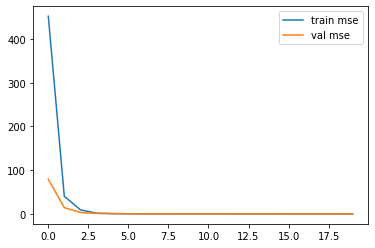

In [20]:
print(model.evaluate(X_test_transformed, y_test))

train_acc = history.history['loss']
val_acc = history.history['val_loss']
x = np.arange(len(train_acc))
plt.plot(x, train_acc, label = 'train mse')
plt.plot(x, val_acc, label = 'val mse')
plt.legend()

# 【問題5】MNISTをKerasで学習
TensorFlowによるMNISTデータセットによる画像の多値分類をKerasに書き換えてください。

In [12]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train  = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.fit_transform(y_test[:,  np.newaxis])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=0)

In [13]:

K.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(200, input_dim=784, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(200, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(loss="categorical_crossentropy",
             optimizer = tf.train.AdamOptimizer(learning_rate=0.01),
             metrics=["accuracy"])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(X_train, y_train,
                   batch_size=12000,
                   epochs=10,
                   verbose=1)

Epoch 1/10
48000/48000 [==============================] - 1s 13us/sample - loss: 1.7702 - acc: 0.4114
Epoch 2/10
48000/48000 [==============================] - 1s 12us/sample - loss: 0.7155 - acc: 0.7657
Epoch 3/10
48000/48000 [==============================] - 1s 12us/sample - loss: 0.4462 - acc: 0.8637
Epoch 4/10
48000/48000 [==============================] - 1s 12us/sample - loss: 0.3366 - acc: 0.8994
Epoch 5/10
48000/48000 [==============================] - 1s 11us/sample - loss: 0.2742 - acc: 0.9182
Epoch 6/10
48000/48000 [==============================] - 1s 11us/sample - loss: 0.2307 - acc: 0.9305
Epoch 7/10
48000/48000 [==============================] - 1s 12us/sample - loss: 0.1953 - acc: 0.9422
Epoch 8/10
48000/48000 [==============================] - 1s 11us/sample - loss: 0.1714 - acc: 0.9491
Epoch 9/10
48000/48000 [==============================] - 1s 11us/sample - loss: 0.1505 - acc: 0.9548
Epoch 10/10
48000/48000 [==============================] - 1s 12us/sample - loss: 